<a href="https://colab.research.google.com/github/CAPalacio03/Casos-confirmados-de-COVID-19/blob/main/An%C3%A1lisis%20de%20casos%20confirmados%20de%20COVID-19%20en%20M%C3%A9xico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Casos de COVID-19 en México

## Objetivo

Este es uno de los proyecto que pertenece al modulo de **Manejo y procesamiento de datos** del curso **Citizen Data Scientis** del **Tecnológico de Monterrey**. El proyecto busca probar y desallorar las habilidades aprendidas durante la subcompetencia de Programación en Python, por lo que es un proyecto bastante sencillo pero, lo que se desarrollará será un análisis más profundo del set de datos, para responder algunas preguntas como:

- ¿Cúal es la edad promedio de pacientes contagiados?
- ¿Hay más hombres o mujeres contagiados?
- ¿Qué Estado tiene el mayor numero de personas contagiadas?
- entre otras.

## Set de datos

Los datos utilizados para el análisis están disponibles de forma abierta en la página de Kaggle y provienen
de una fuente oficial, por lo que son una base confiable para realizar el análisis
que vas a llevar a cabo. Ahí mismo hay una liga en caso de que quieras obtener
datos posteriores a abril de 2020.

## Pre-procesamiento de datos

### Utilización de librerias

In [ ]:
#Librerias para la manipulación y manejo de datos
import pandas as pd
import numpy as np

#Librerias para la vizualización de datos
import seaborn as sns
import matplotlib.pyplot as plt



### Importación de Datos

Importamos los datos del archivo csv llamado *casos_confirmados* y visualizamos el dataframe para tener una primera impresión de los datos.

In [ ]:
casos = pd.read_csv('casos_confirmados.csv')
casos

,Unnamed: 0,State,Sex,Age,Date,Confirmed
0,0,distrito federal,MASCULINO,28,2020-03-23,1
1,1,distrito federal,MASCULINO,49,2020-04-13,1
2,2,chihuahua,FEMENINO,67,2020-04-15,1
3,3,veracruz de ignacio de la llave,FEMENINO,41,2020-04-27,1
4,4,méxico,MASCULINO,43,2020-06-06,1
...,...,...,...,...,...,...
370707,724196,sinaloa,MASCULINO,77,2020-07-16,1
370708,724197,nuevo león,MASCULINO,79,2020-07-17,1
370709,724198,guanajuato,MASCULINO,35,2020-07-17,1
370710,724199,méxico,MASCULINO,36,2020-07-17,1


Con esta primera impresion observamos que el set de datos debe procesarce para tener un nuevo conjunto de datos que sea facil de análizar.

Lo primero que debemos de realizar es:
- Eliminar columnas incesarias
- Modificalor los valores de los datos
- Cambiar tipos de datos para su mejor manejo
- Resumir datos para el análisi descriptivo.

### Ordenamiento y procesamiento de Datos

Observamos las dimensiones del conjunto de datos

In [ ]:
casos.shape

(370712, 6)

El conjunto cuenta con 6 Columnas, de las cuales eliminaremos una de ellas que es el regirsto de datos. Y contiene 370'712 valores de datos.

In [ ]:
casos.drop(columns=['Unnamed: 0'], inplace=True)

Verificamos si no exisisten valores faltantes y el tipo de dato para cada variable.

In [ ]:
casos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370712 entries, 0 to 370711
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      370712 non-null  object
 1   Sex        370712 non-null  object
 2   Age        370712 non-null  int64 
 3   Date       370712 non-null  object
 4   Confirmed  370712 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 14.1+ MB


El conjunto de datos no contiene datos faltantes pero, de acuerdo con los tipos de datos. Estos no son adecuados para los valores que tienen. Por lo que, procederemos a cambiarlos para su mejor manejo.

Uno de estos valores son los asociados a la columna *Date*. De acuerdo con el set ortiginal, el tipo de dato es de texto. Cambiaremos este tipo de dato por de tipo *datetime*

In [ ]:
casos['Date'] = pd.to_datetime(casos['Date'])
casos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 370712 entries, 0 to 370711
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   State      370712 non-null  object        
 1   Sex        370712 non-null  object        
 2   Age        370712 non-null  int64         
 3   Date       370712 non-null  datetime64[ns]
 4   Confirmed  370712 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 14.1+ MB


Lo siguiente será modificar los valores de datos para su mejor entendimiento.

Comencemos verificando como estan los valores de los datos en la columna *State*

In [ ]:
casos['State'].unique()

array(['distrito federal', 'chihuahua', 'veracruz de ignacio de la llave',
       'méxico', 'oaxaca', 'jalisco', 'yucatán', 'tabasco', 'sinaloa',
       'baja california', 'puebla', 'quintana roo', 'sonora',
       'nuevo león', 'aguascalientes', 'hidalgo', 'guerrero', 'durango',
       'morelos', 'tamaulipas', 'chiapas', 'nayarit', 'querétaro',
       'coahuila', 'baja california sur', 'michoacán', 'guanajuato',
       'tlaxcala', 'colima', 'campeche', 'zacatecas', 'san luis potosí'],
      dtype=object)

Modificando el valor del Estado de "veracruz de ignacio de la llave" por "veracruz" y "distrito federal" por "cuidad de méxico"

In [ ]:
casos['State'] = casos['State'].str.replace('veracruz de ignacio de la llave', 'veracruz')
casos['State'] = casos['State'].str.replace('distrito federal', 'cuidad de méxico')
casos['State'].unique()

array(['cuidad de méxico', 'chihuahua', 'veracruz', 'méxico', 'oaxaca',
       'jalisco', 'yucatán', 'tabasco', 'sinaloa', 'baja california',
       'puebla', 'quintana roo', 'sonora', 'nuevo león', 'aguascalientes',
       'hidalgo', 'guerrero', 'durango', 'morelos', 'tamaulipas',
       'chiapas', 'nayarit', 'querétaro', 'coahuila',
       'baja california sur', 'michoacán', 'guanajuato', 'tlaxcala',
       'colima', 'campeche', 'zacatecas', 'san luis potosí'], dtype=object)

Cambiando los valores de forma que cada inicio de palabra empiece con mayusculas.

In [ ]:
casos['State'] = casos['State'].str.title()
casos['State'].unique()

array(['Cuidad De México', 'Chihuahua', 'Veracruz', 'México', 'Oaxaca',
       'Jalisco', 'Yucatán', 'Tabasco', 'Sinaloa', 'Baja California',
       'Puebla', 'Quintana Roo', 'Sonora', 'Nuevo León', 'Aguascalientes',
       'Hidalgo', 'Guerrero', 'Durango', 'Morelos', 'Tamaulipas',
       'Chiapas', 'Nayarit', 'Querétaro', 'Coahuila',
       'Baja California Sur', 'Michoacán', 'Guanajuato', 'Tlaxcala',
       'Colima', 'Campeche', 'Zacatecas', 'San Luis Potosí'], dtype=object)

Haciendo lo mismo para la columna *Sex*

In [ ]:
casos['Sex'].unique()

array(['MASCULINO', 'FEMENINO'], dtype=object)

In [ ]:
casos['Sex'] = casos['Sex'].str.title()
casos['Sex'].unique()

array(['Masculino', 'Femenino'], dtype=object)

Observamos como ha quedado nuestro nuevo set datos.

In [ ]:
casos

,State,Sex,Age,Date,Confirmed
0,Cuidad De México,Masculino,28,2020-03-23,1
1,Cuidad De México,Masculino,49,2020-04-13,1
2,Chihuahua,Femenino,67,2020-04-15,1
3,Veracruz,Femenino,41,2020-04-27,1
4,México,Masculino,43,2020-06-06,1
...,...,...,...,...,...
370707,Sinaloa,Masculino,77,2020-07-16,1
370708,Nuevo León,Masculino,79,2020-07-17,1
370709,Guanajuato,Masculino,35,2020-07-17,1
370710,México,Masculino,36,2020-07-17,1


## Análisis estadistico de datos

### Análisis univariado

Comenzaremos nuestro análisis estudiando primero nuestros datos categoricos.

#### Datos Categoricos

##### Estados

Obtenemos información básica de cúal de los 32 Estados de la Republica tiene el mayor número de cassos confirmados.

In [ ]:
casos['State'].describe()

count               370712
unique                  32
top       Cuidad De México
freq                 66444
Name: State, dtype: object

Realizamos un resumen de los datos para saber la frecuencia con la que cada estado tiene sus casos confirmados

In [ ]:
casos_por_estado = casos.groupby(['State'], as_index= False).sum()
casos_por_estado.drop(columns='Age', inplace=True)
casos_por_estado

<ipython-input-14-6b299def391a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  casos_por_estado = casos.groupby(['State'], as_index= False).sum()


,State,Confirmed
0,Aguascalientes,3620
1,Baja California,12533
2,Baja California Sur,3482
3,Campeche,3845
4,Chiapas,5547
5,Chihuahua,4635
6,Coahuila,10404
7,Colima,1316
8,Cuidad De México,66444
9,Durango,3536


Gráficamos los datos para poder visualizarlos mejor

<Axes: xlabel='Confirmed', ylabel='State'>

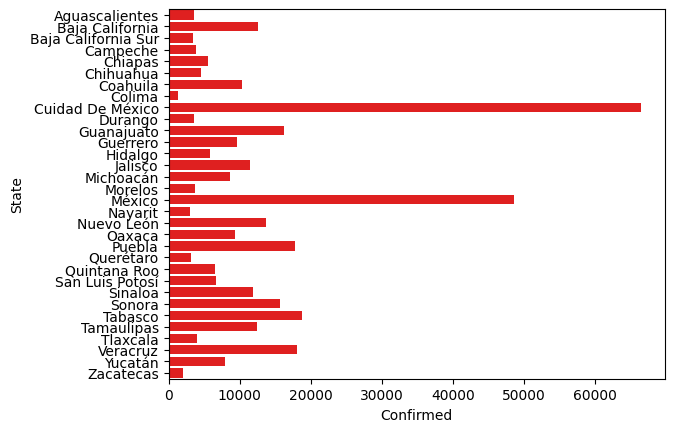

In [ ]:
sns.barplot(data=casos_por_estado, y='State', x='Confirmed', color='red')

#### Sexo

Ahora análisamos la variable de sexo para saber, si hay más contiagados hombres o mujeres.

In [ ]:
casos['Sex'].describe()

count        370712
unique            2
top       Masculino
freq         198358
Name: Sex, dtype: object

Se tiene registro de que hay más Hombres contagiados con 198'358  

Resumiendo los datos.

In [ ]:
casos_por_genero = casos.groupby(['Sex'], as_index= False).sum()
casos_por_genero.drop(columns='Age', inplace=True)
casos_por_genero

<ipython-input-17-a661b4834bcc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  casos_por_genero = casos.groupby(['Sex'], as_index= False).sum()


,Sex,Confirmed
0,Femenino,172354
1,Masculino,198358


Visualizando los datos


<Axes: xlabel='Sex', ylabel='Confirmed'>

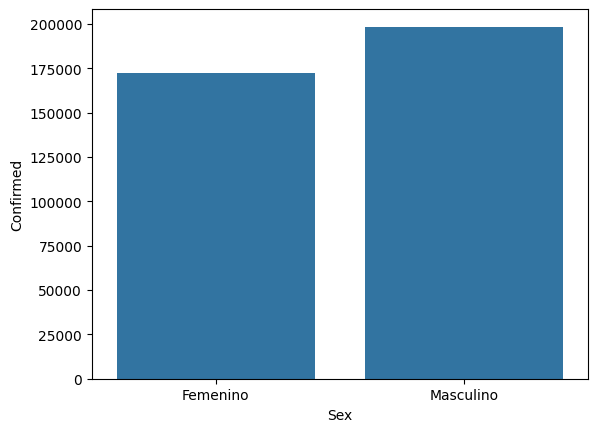

In [ ]:
sns.barplot(data=casos_por_genero, x='Sex', y='Confirmed')

#### Datos númericos

Ahora análisamos nuestras variable numericas.

##### Edad

Comenzamos a examinar las medidas de tendencia central y de dispersión.

In [ ]:
casos['Age'].describe()

count    370712.000000
mean         45.319992
std          16.409412
min           0.000000
25%          33.000000
50%          44.000000
75%          56.000000
max         119.000000
Name: Age, dtype: float64

En total se tiene registrados 370 mil 712 personas confirmadas con COVID-19. La edad promedio de contagió es de 45 años, con una desviación de 16.40 años.

Visualizando la dispersión de los datos a traves de un histograma

<Axes: xlabel='Age', ylabel='Count'>

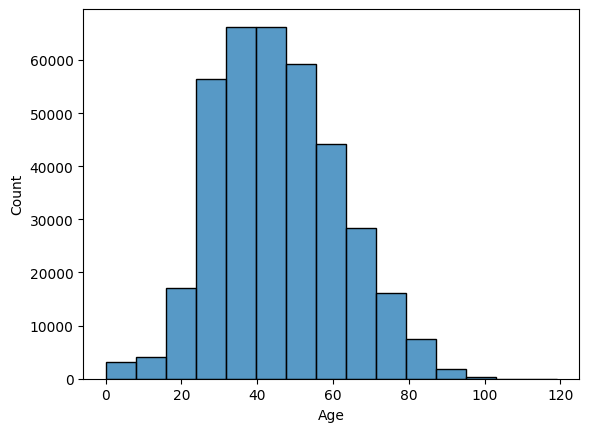

In [ ]:
sns.histplot(data=casos, x='Age', bins=15)

Como podemos observar en el diagrama exiten pequeños registros en edades muy grandes como 100. Veamos con más detalle estos datos atípicos, a traves de un boxplot.

<Axes: xlabel='Age'>

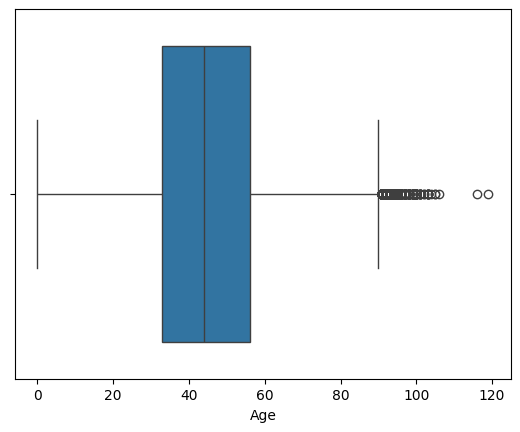

In [ ]:
casos['Age'] = casos['Age'].astype('int')
sns.boxplot(data=casos, x='Age')

Para el caso de la variable edad, encontramos valores atipicos despues del valor de 85 años. Teniendo dos valores extremos que pasan el valor de 100 años.

## Serie de tiempo

Ahora analizaremos los datos temporales, esto se debe hacer en una sección aparta devido a las propiedades de los datos.

Como primer paso agrupamos los datos por fecha y sumamos los casos para obtener el total de casos confirmados por día. Obteniendo así una nueva tabala.

In [ ]:
casos_por_dia = casos.groupby(casos['Date'].dt.date).sum()
casos_por_dia.drop(columns='Age', inplace=True)
casos_por_dia

<ipython-input-22-33c7da7b07bc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  casos_por_dia = casos.groupby(casos['Date'].dt.date).sum()


,Confirmed
Date,
2020-01-13,1
2020-01-29,1
2020-02-27,4
2020-02-28,2
2020-02-29,1
...,...
2020-07-19,1646
2020-07-20,3481
2020-07-21,1497


Con esta nueva tabla podemos análizar como se distribuyen los datos temporales obteniendo el la acumlación máxima de casos, la media de casos por día, entre más.

In [ ]:
casos_por_dia.describe()

,Confirmed
count,147.000000
mean,2521.850340
std,2337.907554
min,1.000000
25%,318.500000
50%,1797.000000
75%,4294.500000
max,7561.000000


Gráficando la seria de tiempo para tener una visualización del comportamiento  de los casos condirmados

<Axes: xlabel='Date', ylabel='Confirmed'>

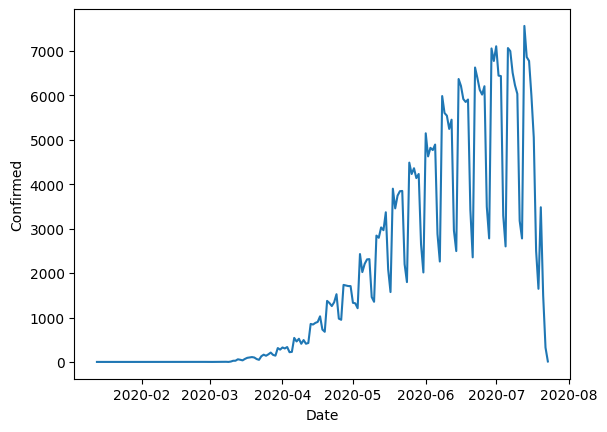

In [ ]:
sns.lineplot(data=casos_por_dia, x='Date', y='Confirmed')

Ahora hallamos el día con más casos confirmados

In [ ]:
casos_por_dia.idxmax()

Confirmed    2020-07-13
dtype: object

In [ ]:
casos_por_dia.max()

Confirmed    7561
dtype: int64

El día con más registros de casos confirmados fue el día 13 de Julio de 2020 con 7 mil 561 casos confirmados en toda la republica mexicana.

Tambien podemos hallar el día de la semana en donde se registran más casos de COVID-19 confirmados.

In [ ]:
casos['Day'] = casos['Date'].dt.day_name()
casos_por_dia_de_semana = casos.groupby('Day').sum()
casos_por_dia_de_semana

<ipython-input-48-48bce4b280b6>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  casos_por_dia_de_semana = casos.groupby('Day').sum()


,Age,Confirmed
Day,,
Friday,2640327,58812
Monday,3031683,67952
Saturday,1611739,34043
Sunday,1337804,27373
Thursday,2639919,58782
Tuesday,2790450,62343
Wednesday,2748743,61407


<Axes: xlabel='Day', ylabel='Confirmed'>

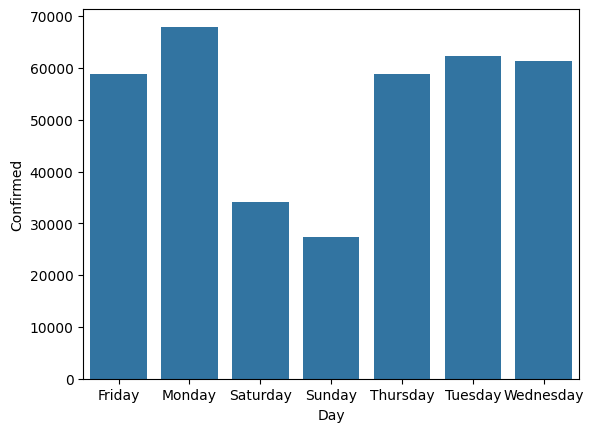

In [ ]:
sns.barplot(data= casos_por_dia_de_semana, x='Day', y='Confirmed')

Los días entre semana son los días en donde se tienen registrados un numero mayor de casos confirmados de COVID-19. Sin embargo, parece interesante que los fines de semana tienen poco regisyros de casos confirmados en compración a los días de entresemana.

## Conclusiones.

De este pequeño análisis podemos concluir que:

- La Cuidad de México es la entidad con más casos confirmados de COVID-19

- Hay más hombres contagiados por COVID-19 que mujeres

- La edad promedio de contagío es de 45 años

- El día con mayor número de contagios registrados fuel el 13 de Julio del 2020

- Los días Lunes son los días de la semana que tienen mayor número de casos confirmados.


